In [748]:
import random
import os
import numpy as np

def seed_everything(seed):
    # Python의 random 모듈 시드 설정
    random.seed(seed)
    
    # OS 환경 변수 PYTHONHASHSEED 설정 (Python의 해시 시드 고정)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    # NumPy의 난수 생성기 시드 설정
    np.random.seed(seed)

# 시드 값 37로 난수 생성기 고정
seed_everything(37)

In [749]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [750]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [987]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

data_df = pd.read_csv("../../data/dacon_open/train.csv", encoding='latin-1')
predict_df = pd.read_csv("../../data/dacon_open/test.csv", encoding='latin-1')
submission_df = pd.read_csv("../../data/dacon_open/sample_submission.csv", encoding='latin-1')

print(data_df['Y_Class'].value_counts())

total_cnt = data_df.Y_Class.count()
standard_cnt = data_df[data_df['Y_Class'] == 1].Y_Class.count()
under_cnt = data_df[data_df['Y_Class'] == 0].Y_Class.count()
over_cnt = data_df[data_df['Y_Class'] == 2].Y_Class.count()
print('standard 비율: {0:.2f}'.format((standard_cnt / total_cnt * 100)))
print('under 비율: {0:.2f}'.format((under_cnt / total_cnt * 100)))
print('over 비율: {0:.2f}'.format((over_cnt / total_cnt * 100)))
print("---------------------------------------------------------")
print('2023: 데이터 세트 Null 값 갯수 ',data_df.isnull().sum().sum())

data_df.head()

Y_Class
1    407
2    103
0     88
Name: count, dtype: int64
standard 비율: 68.06
under 비율: 14.72
over 비율: 17.22
---------------------------------------------------------
2023: 데이터 세트 Null 값 갯수  1172834


,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [988]:
# 라벨 노이즈: 동일한 특징을 가지지만 서로 다른 클래스 레이블을 가진 것

def find_noise_instances(df):
    # 중복된 인스턴스들을 모두 찾기 (레이블을 제외한 모든 열)
    # 지정된 열을 기준으로 중복된 행을 찾는다. / keep=False는 모든 중복된 행을 반환해 중복된 행들이 duplicates 데이터프레임에 저장된다.
    duplicates = df[df.duplicated(subset=df.columns[:-1], keep=False)]
    return duplicates

noise_instances = find_noise_instances(data_df)

noise_instances

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875


In [989]:
data_df['TIMESTAMP'] = pd.to_datetime(data_df['TIMESTAMP'])

data_df['Month'] = data_df['TIMESTAMP'].dt.month
data_df['Day'] = data_df['TIMESTAMP'].dt.day
data_df['Hour'] = data_df['TIMESTAMP'].dt.hour
data_df['Minute'] = data_df['TIMESTAMP'].dt.minute

data_df.drop(["TIMESTAMP"], axis=1, inplace=True)



predict_df['TIMESTAMP'] = pd.to_datetime(predict_df['TIMESTAMP'])

predict_df['Month'] = predict_df['TIMESTAMP'].dt.month
predict_df['Day'] = predict_df['TIMESTAMP'].dt.day
predict_df['Hour'] = predict_df['TIMESTAMP'].dt.hour
predict_df['Minute'] = predict_df['TIMESTAMP'].dt.minute

predict_df.drop(["TIMESTAMP"], axis=1, inplace=True)

data_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,Month,Day,Hour,Minute
0,TRAIN_000,1,0.533433,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,77.77,NaN,NaN,NaN,NaN,NaN,6,13,5,14
1,TRAIN_001,2,0.541819,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,72.55,NaN,NaN,NaN,NaN,NaN,6,13,5,22
2,TRAIN_002,1,0.531267,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,78.35,NaN,NaN,NaN,NaN,NaN,6,13,5,30
3,TRAIN_003,2,0.537325,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,71.78,NaN,NaN,NaN,NaN,NaN,6,13,5,39
4,TRAIN_004,1,0.531590,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,76.97,NaN,NaN,NaN,NaN,NaN,6,13,5,47


In [990]:
all_nan_columns = data_df.columns[data_df.isna().all()].tolist()
print(f"모든 값이 NaN인 컬럼 개수: {len(all_nan_columns)}")
# print(f"모든 값이 NaN인 컬럼: {all_nan_columns}")


predict_all_nan_columns = predict_df.columns[predict_df.isna().all()].tolist()
print(f"모든 값이 NaN인 컬럼 개수: {len(predict_all_nan_columns)}")
# print(f"모든 값이 NaN인 컬럼: {all_nan_columns}")

모든 값이 NaN인 컬럼 개수: 82
모든 값이 NaN인 컬럼 개수: 506


In [991]:
data_df.drop(columns=all_nan_columns, inplace=True)
predict_df.drop(columns=all_nan_columns, inplace=True)

In [992]:
from sklearn.preprocessing import LabelEncoder

features = ['LINE', 'PRODUCT_CODE']
le = LabelEncoder()
for i in features:
    encoder = LabelEncoder()
    encoder.fit(data_df[i])
    data_df[i] = encoder.transform(data_df[i])
    predict_df[i] = encoder.transform(predict_df[i])

data_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day,Hour,Minute
0,TRAIN_000,1,0.533433,2,0,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,6,13,5,14
1,TRAIN_001,2,0.541819,3,0,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,6,13,5,22
2,TRAIN_002,1,0.531267,2,0,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,6,13,5,30
3,TRAIN_003,2,0.537325,3,0,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,6,13,5,39
4,TRAIN_004,1,0.531590,2,0,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,6,13,5,47


### 고유한 값의 수가 1인 경우 -> 열에 있는 모든 값이 5라면, 그 열의 고유한 값의 수는 1

In [993]:
unique_one_columns = [col for col in data_df.columns if data_df[col].nunique() == 1]
print(len(unique_one_columns))

377


In [994]:
data_df.drop(columns=columns_to_drop, inplace=True, axis=1)
predict_df = predict_df.drop(columns=columns_to_drop, axis=1)
data_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_4,X_5,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day,Hour,Minute
0,TRAIN_000,1,0.533433,2,0,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,6,13,5,14
1,TRAIN_001,2,0.541819,3,0,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,6,13,5,22
2,TRAIN_002,1,0.531267,2,0,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,6,13,5,30
3,TRAIN_003,2,0.537325,3,0,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,6,13,5,39
4,TRAIN_004,1,0.531590,2,0,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,6,13,5,47


In [ ]:
# 결측치를 0으로 대체
data_df.fillna(0, inplace=True)
predict_df.fillna(0, inplace=True)

In [947]:
y_df = data_df['Y_Class']
X_df = data_df.drop(['Y_Class'], axis=1)

In [948]:
predict_df['Y_Quality'] = 0  # 예측 데이터셋에서 임시로 0으로 설정

# # 피처 순서를 학습 데이터셋과 일치시키기 위해 predict_df의 컬럼 순서 재정렬
predict_df = predict_df[X_df.columns]

In [1009]:
test_df = X_df.drop(['Y_Quality'], axis=1)
test_df

,LINE,PRODUCT_CODE,X_1,X_2,X_4,X_5,X_7,X_8,X_9,X_10,...,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day,Hour,Minute,anomaly
0,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,1.609628,1.329081,1.321937,2.713654,-0.441338,-1.765394,-0.303613,-0.862470,-0.903186,-1
1,-0.126072,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,1.706157,1.944922,1.386317,2.501969,-0.441338,-1.765394,-0.303613,-0.862470,-0.424757,-1
2,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,1.397566,1.866315,1.447607,2.737174,-0.441338,-1.765394,-0.303613,-0.862470,0.053673,-1
3,-0.126072,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,1.523603,2.392165,1.141159,2.470744,-0.441338,-1.765394,-0.303613,-0.862470,0.591906,-1
4,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,1.659643,2.108098,1.270434,2.681212,-0.441338,-1.765394,-0.303613,-0.862470,1.070335,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,1.046005,0.852752,0.125814,0.835060,0.839566,0.760835,0.880911,0.829262,1.260955,0.839566,...,-0.435475,-0.436038,-0.433827,-0.440120,-0.441338,2.026698,-0.871695,0.502746,0.053673,1
591,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,2.218808,2.322775,2.404032,2.256221,2.265838,2.026698,-0.871695,1.716272,0.532102,-1
592,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,-1.191092,...,-0.435475,-0.436038,-0.433827,-0.440120,2.265838,2.026698,-0.871695,1.716272,1.070335,-1
593,0.459967,-0.166098,8.276691,0.813760,0.839566,0.955711,0.674848,0.829262,0.304154,0.839566,...,-0.435475,-0.436038,-0.433827,-0.440120,-0.441338,2.026698,-0.871695,0.502746,0.532102,1


In [952]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)
print('피처 데이터 shape:{0}'.format(X.shape))

predict_df_scaled = sc.transform(predict_df)
predict_df = pd.DataFrame(predict_df_scaled, columns=predict_df.columns)

print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(595, 2601)
피처 데이터 shape:(310, 2601)


In [953]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_3, y_3 = smoteto.fit_resample(X_df, y)

print('피처 데이터 shape:{0}'.format(X_3.shape))
print('피처 데이터 shape:{0}'.format(y_3.shape))
print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(1221, 2601)
피처 데이터 shape:(1221,)
피처 데이터 shape:(310, 2601)


In [954]:
predict_df = predict_df.drop(['Y_Quality'], axis=1)

## Y_Quality

<Axes: >

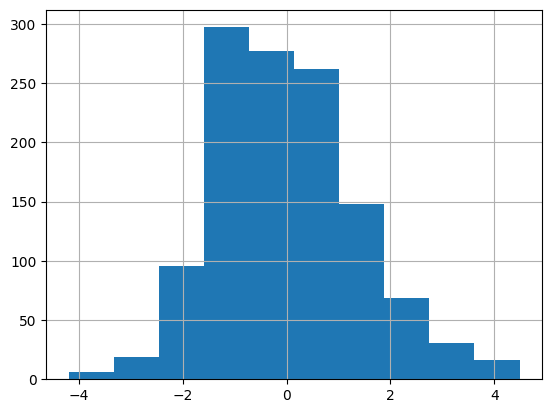

In [774]:
X_3['Y_Quality'].hist()

In [701]:
from sklearn.model_selection import train_test_split

y_quality = X_3['Y_Quality']
X = X_3.drop(columns=['Y_Quality'])


xtrain_q, xtest_q, ytrain_q, ytest_q = train_test_split(X, y_quality, test_size=0.25, random_state=0)

X_tr, X_val, y_tr, y_val= train_test_split(xtrain_q, ytrain_q, test_size=0.1, random_state=0 )

In [717]:
# from sklearn.ensemble import VotingRegressor
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=1.4,
    bagging_temperature=0.5,
    subsample=0.7,
    rsm=1.0,
    early_stopping_rounds=50,
    verbose=0
)

cat.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

train_pred = cat.predict(xtrain_q)
test_pred = cat.predict(xtest_q)

print("train")
evaluate_regr(ytrain_q ,train_pred)
print("test")
evaluate_regr(ytest_q ,test_pred)

train
RMSLE: 0.323, RMSE: 0.135, MAE: 0.080
test
RMSLE: 0.647, RMSE: 0.404, MAE: 0.280


In [715]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope

space = {
    'iterations': scope.int(hp.quniform('iterations', 300, 500, 50)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'depth': scope.int(hp.quniform('depth', 3, 6, 1)),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1.0, 5.0),
    'bagging_temperature': hp.uniform('bagging_temperature', 0.5, 1.5),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'rsm': hp.uniform('rsm', 0.7, 1.0),
}

# 목적 함수 정의
def objective(params):
    model = CatBoostRegressor(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        depth=int(params['depth']),
        l2_leaf_reg=params['l2_leaf_reg'],
        bagging_temperature=params['bagging_temperature'],
        subsample=params['subsample'],
        rsm=params['rsm'],
        early_stopping_rounds=50,
        verbose=0
    )
    
    model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=0)
    pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred, squared=False)
    return {'loss': rmse, 'status': STATUS_OK}


trials = Trials()

# fmin 함수 호출
best = fmin(fn=objective, 
            space=space, 
            algo=tpe.suggest, 
            max_evals=50, 
            trials=trials)

print("Best parameters found: ", best)

# 최적의 하이퍼파라미터로 모델 생성 및 학습
best_params = {
    'iterations': int(best['iterations']),
    'learning_rate': best['learning_rate'],
    'depth': int(best['depth']),
    'l2_leaf_reg': best['l2_leaf_reg'],
    'bagging_temperature': best['bagging_temperature'],
    'subsample': best['subsample'],
    'rsm': best['rsm'],
    'early_stopping_rounds': 50,
    'verbose': 0
}

# 최적의 하이퍼파라미터로 모델 학습
cat = CatBoostRegressor(**best_params)
cat.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=0)


train_pred = cat.predict(xtrain_q)
test_pred = cat.predict(xtest_q)

# 예측
print("train")
evaluate_regr(ytrain_q ,train_pred)
print("test")
evaluate_regr(ytest_q ,test_pred)

100%|█████████| 50/50 [12:18<00:00, 14.76s/trial, best loss: 0.3125713017595229]
Best parameters found:  {'bagging_temperature': 0.5020905305915697, 'depth': 6.0, 'iterations': 500.0, 'l2_leaf_reg': 1.436127004874472, 'learning_rate': 0.08518689175186589, 'rsm': 0.997571425448646, 'subsample': 0.7049939787314891}
train
RMSLE: 0.491, RMSE: 0.201, MAE: 0.144
test
RMSLE: 0.593, RMSE: 0.455, MAE: 0.326


In [830]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

cat_reg =  CatBoostRegressor(iterations=1000, learning_rate=0.05, verbose=0)
gbm_reg = GradientBoostingRegressor(n_estimators=1000, min_samples_split=25, min_samples_leaf=25, verbose=0)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8, verbose=0)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1, verbose=0)

In [833]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [834]:
X_train_n = xtrain_q.values
X_test_n = xtest_q.values
y_train_n = ytrain_q.values

gbm_train, gbm_test = get_stacking_base_datasets(gbm_reg, X_train_n, y_train_n, X_test_n, 5)  
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)
cat_train, cat_test = get_stacking_base_datasets(cat_reg, X_train_n, y_train_n, X_test_n, 5)

GradientBoostingRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
CatBoostRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [835]:
Stack_final_X_train = np.concatenate((gbm_train, cat_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((gbm_test, cat_test, xgb_test, lgbm_test), axis=1)

meta_model_lasso = Lasso(alpha=0.0005)


#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, ytrain_q)
final = meta_model_lasso.predict(Stack_final_X_test)

mse = mean_squared_error(ytest_q , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델 최종 RMSE 값:', rmse)

스태킹 회귀 모델 최종 RMSE 값: 0.3954806756022698


In [836]:
train_pred = meta_model_lasso.predict(Stack_final_X_train)
test_pred = meta_model_lasso.predict(Stack_final_X_test)


def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle


def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))


print("train")
evaluate_regr(ytrain_q ,train_pred)
print("test")
evaluate_regr(ytest_q ,final)

train
RMSLE: 0.667, RMSE: 0.383, MAE: 0.255
test
RMSLE: 0.539, RMSE: 0.395, MAE: 0.261


In [842]:
def get_model_predictions(model, X_train_n, y_train_n, X_predict_n):
    model.fit(X_train_n, y_train_n)
    predict_values = model.predict(X_predict_n)
    return predict_values.reshape(-1, 1)


# predict_df에 대해 개별 모델의 예측값 생성
predict_df_predictions = []
predict_df_n = predict_df.drop(columns=['Y_Quality']).values

predict_gbm = get_model_predictions(gbm_reg, X_train_n, y_train_n, predict_df_n)
predict_xgb = get_model_predictions(xgb_reg, X_train_n, y_train_n, predict_df_n)
predict_lgbm = get_model_predictions(lgbm_reg, X_train_n, y_train_n, predict_df_n)
predict_cat = get_model_predictions(cat_reg, X_train_n, y_train_n, predict_df_n)


# 예측값 결합
Stack_final_predict = np.concatenate((predict_gbm, predict_cat, predict_xgb, predict_lgbm), axis=1)

# 최종 메타 모델로 예측
predict_quality = meta_model_lasso.predict(Stack_final_predict)
predict_df['Y_Quality'] = predict_quality

     Y_Quality      LINE  PRODUCT_CODE       X_1       X_2       X_4  \
0    -0.057693  1.046005      0.852752  0.125814  0.813760  0.839566   
1     0.614558  0.459967      0.852752  0.125814  0.792461  0.839566   
2     0.603411  0.459967      0.852752  0.125814  0.835060  0.839566   
3    -1.149350 -1.884189     -1.184949 -0.303179 -1.188422 -1.191092   
4     0.418214 -1.298150     -1.184949 -0.303179 -1.188422 -1.191092   
..         ...       ...           ...       ...       ...       ...   
305  -0.272437  1.046005      0.852752  0.125814  0.749861  0.839566   
306  -0.468232  0.459967      0.852752  0.125814  0.856360  0.839566   
307  -0.368488  1.046005      0.852752  0.125814  0.749861  0.839566   
308  -0.342110  1.046005      0.852752  0.125814  0.835060  0.839566   
309  -0.403655  1.046005      0.852752  0.125814  0.664662  0.839566   

          X_5       X_7       X_8       X_9  ...    X_2866    X_2867  \
0    0.760835  0.922123  0.829262  1.260955  ... -0.436618 -0.4

In [844]:
predict_df

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_4,X_5,X_7,X_8,X_9,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day,Hour,Minute
0,-0.057693,1.046005,0.852752,0.125814,0.813760,0.839566,0.760835,0.922123,0.829262,1.260955,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,2.029470,-0.759743,-1.316556,-1.690677
1,0.614558,0.459967,0.852752,0.125814,0.792461,0.839566,0.955711,0.674848,0.829262,0.304154,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,2.029470,-0.759743,-1.316556,-1.211509
2,0.603411,0.459967,0.852752,0.125814,0.835060,0.839566,0.955711,0.674848,0.829262,0.304154,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,2.029470,-0.759743,-0.406741,0.765058
3,-1.149350,-1.884189,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,2.029470,-0.759743,-0.103469,1.603601
4,0.418214,-1.298150,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,2.029470,-0.759743,0.048167,-1.510989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.272437,1.046005,0.852752,0.125814,0.749861,0.839566,0.760835,0.922123,0.829262,1.260955,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,4.563646,-1.213720,0.048167,-0.672446
306,-0.468232,0.459967,0.852752,0.125814,0.856360,0.839566,0.955711,0.674848,0.829262,0.304154,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,4.563646,-1.213720,0.806346,0.585370
307,-0.368488,1.046005,0.852752,0.125814,0.749861,0.839566,0.760835,0.880911,0.829262,1.260955,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,4.563646,-1.213720,0.806346,1.064538
308,-0.342110,1.046005,0.852752,0.125814,0.835060,0.839566,0.760835,0.922123,0.829262,1.260955,...,-0.436618,-0.436139,-0.436079,-0.43423,-0.44015,-0.444053,4.563646,-1.213720,1.412889,1.423914


In [848]:
X_3

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_4,X_5,X_7,X_8,X_9,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day,Hour,Minute
0,0.371022,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,1.630155,1.595918,1.323997,1.314816,2.717901,-0.444053,-1.771794,-0.305767,-0.861648,-0.912029
1,1.546978,-0.126072,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,1.606514,1.691831,1.938077,1.378950,2.505930,-0.444053,-1.771794,-0.305767,-0.861648,-0.432862
2,0.067183,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,1.622275,1.385208,1.859695,1.440005,2.741454,-0.444053,-1.771794,-0.305767,-0.861648,0.046306
3,0.916819,-0.126072,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,1.546098,1.510442,2.384042,1.134730,2.474662,-0.444053,-1.771794,-0.305767,-0.861648,0.585370
4,0.112592,-0.712111,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,1.596532,1.645614,2.100787,1.263510,2.685415,-0.444053,-1.771794,-0.305767,-0.861648,1.064538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1.688805,0.459967,0.852752,0.068878,0.937221,0.839566,0.812563,0.674848,0.829262,0.304154,...,-0.436618,-0.436139,-0.436079,-0.434230,-0.440150,-0.444053,-0.168370,1.178756,0.562054,0.293288
1217,1.983788,-1.298150,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,-0.436618,-0.436139,-0.436079,-0.434230,-0.440150,-0.444053,-1.771794,0.918495,-0.742311,-0.016075
1218,2.054825,-1.298150,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,-0.436618,-0.436139,-0.436079,-0.434230,-0.440150,-0.444053,-0.504706,0.586187,-0.776144,0.403254
1219,1.009452,-1.298150,-1.184949,-0.303179,-1.188422,-1.191092,-1.187924,-1.179720,-1.190431,-1.108265,...,-0.436618,-0.436139,-0.436079,-0.434230,-0.440150,-0.444053,-1.675512,1.048921,-0.489243,0.080353


In [955]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(976, 2601), 테스트 세트 Shape:(245, 2601) 

학습 세트 레이블 값 분포 비율
Y_Class
0    34.016393
1    33.299180
2    32.684426
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
Y_Class
2    35.918367
1    33.469388
0    30.612245
Name: count, dtype: float64 



In [956]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    'max_depth': [2, 3, 4, 8, 10],
    'min_samples_leaf' : [6, 12, 24],
    'min_samples_split' : [8, 16, 24]
}


rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, criterion='gini')
grid_cv = GridSearchCV(rf_clf, param_grid=params , cv=StratifiedKFold(), n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

train_preds = grid_cv.predict(X_train)
train_pred_proba = grid_cv.predict_proba(X_train)[:, 1]
ws_preds = grid_cv.predict(X_test)
ws_pred_proba = grid_cv.predict_proba(X_test)[:, 1]

get_clf_eval(y_train, train_preds, train_pred_proba)
get_clf_eval(y_test, ws_preds, ws_pred_proba)

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 8}
최고 예측 정확도: 0.8873
오차 행렬
[[328   4   0]
 [  1 323   1]
 [  0   5 314]]
정확도: 0.9887, 정밀도: 0.9889, 재현율: 0.9887, F1: 0.9887
오차 행렬
[[73  1  1]
 [ 1 76  5]
 [ 1 10 77]]
정확도: 0.9224, 정밀도: 0.9249, 재현율: 0.9251, F1: 0.9244


In [906]:
rf_clf = RandomForestClassifier(n_estimators=400, max_depth=6, min_samples_leaf=15, min_samples_split=15, n_jobs=-1, oob_score=True, criterion='gini')
rf_clf.fit(X_train, y_train)

train_preds = rf_clf.predict(X_train)
train_pred_proba = rf_clf.predict_proba(X_train)[:, 1]
ws_preds = rf_clf.predict(X_test)
ws_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_train, train_preds, train_pred_proba)
get_clf_eval(y_test, ws_preds, ws_pred_proba)

오차 행렬
[[307  20   4]
 [ 30 270  28]
 [  1  36 280]]
정확도: 0.8781, 정밀도: 0.8780, 재현율: 0.8780, F1: 0.8779
오차 행렬
[[65  9  2]
 [ 6 67  6]
 [ 2 13 75]]
정확도: 0.8449, 정밀도: 0.8489, 재현율: 0.8456, F1: 0.8457


In [958]:
predict_santander_pred_is_rf = grid_cv.predict(predict_df)
submission_df['Y_Class'] = predict_santander_pred_is_rf
submission_df.to_csv('submission_is_rf.csv', index=False)
submission_df

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Y_Quality


In [271]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print('학습 세트 Shape:{0}, 검증 세트 Shape:{1}'.format(X_tr.shape , X_val.shape))


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

학습 세트 Shape:(683, 2800), 검증 세트 Shape:(293, 2800)


오차 행렬
[[74  0  0]
 [ 0 81  0]
 [ 0  2 88]]
정확도: 0.9918, 정밀도: 0.9920, 재현율: 0.9926, F1: 0.9922


In [ ]:
predict_pred_svc = lgbm_wrapper.predict(predict_df)

submission_df['TARGET'] = predict_pred_svc
submission_df.to_csv('submission_lgbm.csv',index=False)
submission_df